# Create an Azure Machine Learning workspace

In [1]:
!mkdir .azureml

In [1]:
from azureml.core import Workspace

ws = Workspace.create(name='webinar-ml-workspace', # provide a name for your workspace
                      subscription_id='627b39d5-583d-4275-89b8-b43f00ec12c5', # provide your subscription ID
                      resource_group='webinar-dryrun-code', # provide a resource group name
                      create_resource_group=True,
                      location='westeurope') # For example: 'westeurope' or 'eastus2' or 'westus2' or 'southeastasia'.

# write out the workspace details to a configuration file: .azureml/config.json
ws.write_config(path='.azureml')

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


Deploying AppInsights with name webinarminsightsff043ee9.
Deployed AppInsights with name webinarminsightsff043ee9. Took 9.22 seconds.
Deploying KeyVault with name webinarmkeyvaultf3a6d03d.
Deploying StorageAccount with name webinarmstoraged7b01a79d.
Deployed KeyVault with name webinarmkeyvaultf3a6d03d. Took 25.34 seconds.
Deployed StorageAccount with name webinarmstoraged7b01a79d. Took 28.39 seconds.
Deploying Workspace with name webinar-ml-workspace.
Deployed Workspace with name webinar-ml-workspace. Took 28.06 seconds.


# Create an Azure Machine Learning compute cluster

In [1]:
from azureml.core import Workspace
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException

ws = Workspace.from_config() # This automatically looks for a directory .azureml

# Choose a name for your CPU cluster
cpu_cluster_name = "cpu-cluster-1279"

# Verify that the cluster does not exist already
try:
    cpu_cluster = ComputeTarget(workspace=ws, name=cpu_cluster_name)
    print('Found existing cluster, use it.')
except ComputeTargetException:
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_D2_V2',
                                                           idle_seconds_before_scaledown=2400,
                                                           min_nodes=0,
                                                           max_nodes=2)
    cpu_cluster = ComputeTarget.create(ws, cpu_cluster_name, compute_config)

cpu_cluster.wait_for_completion(show_output=True)

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


Found existing cluster, use it.
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


Using TensorFlow backend.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


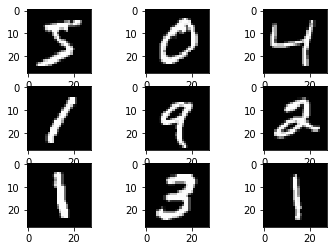

In [2]:
import os
import azureml
from azureml.core import Experiment
from azureml.core import Environment
from azureml.core import Workspace, Run
from azureml.core.compute import ComputeTarget, AmlCompute
from azureml.core.compute_target import ComputeTargetException
from keras.datasets import mnist
from matplotlib import pyplot
from azureml.core import ScriptRunConfig
from azureml.widgets import RunDetails
%matplotlib inline

# load mnist dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

# show the sample images from the training set
pyplot.show()

In [8]:
from azureml.core import ScriptRunConfig
import argparse

experiment_name = 'Digits-Classifier'
experiment = Experiment(workspace=ws, name=experiment_name)

keras_env = Environment.from_conda_specification(name='keras-env', file_path='conda_dependencies.yml')

script_folder = './'

args  = ['--epochs', 3,
         '--batch_size', 64,
         '--dropout', 0.3,
         '--hidden', 100,
         '--learning_rate', 0.01,
         '--momentum', 0.9]

src = ScriptRunConfig(source_directory=script_folder,
                      script='digits_classifier_train.py',
                      arguments=args,
                      compute_target=cpu_cluster_name,
                      environment=keras_env)

from azureml.widgets import RunDetails

run = experiment.submit(src)

run.wait_for_completion(show_output=True)

RunDetails(run).show()

RunId: Digits-Classifier_1618059873_b1691f8e
Web View: https://ml.azure.com/runs/Digits-Classifier_1618059873_b1691f8e?wsid=/subscriptions/627b39d5-583d-4275-89b8-b43f00ec12c5/resourcegroups/webinar-dryrun-code/workspaces/webinar-ml-workspace&tid=c5eef0ea-2adf-445f-8104-084ab26b162b

Streaming azureml-logs/55_azureml-execution-tvmps_ba6b2c3e7abdee039b51f9c0526dffee21a14819c7e733e2014a11c440b5ba93_d.txt

2021-04-10T13:04:48Z Successfully mounted a/an Blobfuse File System at /mnt/batch/tasks/shared/LS_root/jobs/webinar-ml-workspace/azureml/digits-classifier_1618059873_b1691f8e/mounts/workspaceblobstore
2021-04-10T13:04:49Z Starting output-watcher...
2021-04-10T13:04:49Z IsDedicatedCompute == True, won't poll for Low Pri Preemption
2021-04-10T13:04:49Z Executing 'Copy ACR Details file' on 10.0.0.4
2021-04-10T13:04:49Z Copy ACR Details file succeeded on 10.0.0.4. Output: 
>>>   
>>>   
Login Succeeded
Using default tag: latest
latest: Pulling from azureml/azureml_61c6f29390aa0be0c916c6be22


Streaming azureml-logs/70_driver_log.txt

bash: /azureml-envs/azureml_c094d677482e7296ed126024bdaa72d9/lib/libtinfo.so.5: no version information available (required by bash)
2021/04/10 13:04:56 Attempt 1 of http call to http://10.0.0.4:16384/sendlogstoartifacts/info
bash: /azureml-envs/azureml_c094d677482e7296ed126024bdaa72d9/lib/libtinfo.so.5: no version information available (required by bash)
2021/04/10 13:04:56 Attempt 1 of http call to http://10.0.0.4:16384/sendlogstoartifacts/status
[2021-04-10T13:04:57.331547] Entering context manager injector.
[context_manager_injector.py] Command line Options: Namespace(inject=['ProjectPythonPath:context_managers.ProjectPythonPath', 'RunHistory:context_managers.RunHistory', 'TrackUserError:context_managers.TrackUserError'], invocation=['digits_classifier_train.py', '--epochs', '3', '--batch_size', '64', '--dropout', '0.3', '--hidden', '100', '--learning_rate', '0.01', '--momentum', '0.9'])
Script type = None
[2021-04-10T13:04:58.553478] Enter

60000/60000 [==============================] - 29s 482us/step - loss: 0.1855 - accuracy: 0.9457 - val_loss: 0.0644 - val_accuracy: 0.9803
Epoch 2/3

 3520/60000 [>.............................] - ETA: 25s - loss: 0.0999 - accuracy: 0.9707


36736/60000 [=================>............] - ETA: 10s - loss: 0.0815 - accuracy: 0.9777


60000/60000 [==============================] - 29s 476us/step - loss: 0.0804 - accuracy: 0.9769 - val_loss: 0.0508 - val_accuracy: 0.9841
Epoch 3/3

 7104/60000 [==>...........................] - ETA: 22s - loss: 0.0622 - accuracy: 0.9807



Streaming azureml-logs/75_job_post-tvmps_ba6b2c3e7abdee039b51f9c0526dffee21a14819c7e733e2014a11c440b5ba93_d.txt

bash: /azureml-envs/azureml_c094d677482e7296ed126024bdaa72d9/lib/libtinfo.so.5: no version information available (required by bash)
[2021-04-10T13:06:42.432631] Entering job release
[2021-04-10T13:06:43.565345] Starting job release
[2021-04-10T13:06:43.571819] Logging experiment finalizing status in history service.
[2021-04-10T13:06:43.572073] job release stage : upload_datastore starting...
Starting the daemon thread to refresh tokens in background for process with pid = 182
[2021-04-10T13:06:43.572531] job release stage : start importing azureml.history._tracking in run_history_release.
[2021-04-10T13:06:43.572568] job release stage : execute_job_release starting...
[2021-04-10T13:06:43.573078] job release stage : copy_batchai_cached_logs starting...
[2021-04-10T13:06:43.575497] job release stage : copy_batchai_cached_logs completed...
[2021-04-10T13:06:43.582559] Enteri

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

In [9]:
model = run.register_model(model_name='keras_digits_classifier',
                           tags={'area': 'mnist'},
                           model_path='outputs/digit_classifier_model.pkl')

print(model.name, model.id, model.version, sep='\t')

keras_digits_classifier	keras_digits_classifier:1	1


In [10]:
from azureml.core.webservice import Webservice
from azureml.core.model import InferenceConfig
from azureml.core.environment import Environment
from azureml.core import Workspace
from azureml.core.conda_dependencies import CondaDependencies
from azureml.core.model import Model
from azureml.core.webservice import AciWebservice

ws = Workspace.from_config()
model = Model(ws, 'keras_digits_classifier')


keras_env = Environment.from_conda_specification(name='keras-env', file_path='conda_dependencies.yml')

inference_config = InferenceConfig(entry_script="score.py", environment=keras_env)

aciconfig = AciWebservice.deploy_configuration(cpu_cores=1, 
                                               memory_gb=1, 
                                               tags={"data": "MNIST",  "method" : "keras-tensorflow"}, 
                                               description='Predict MNIST with Keras')

service = Model.deploy(workspace=ws, 
                       name='sklearn-mnist-svc', 
                       models=[model], 
                       inference_config=inference_config, 
                       deployment_config=aciconfig)

service.wait_for_deployment(show_output=True)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2021-04-10 16:07:52+03:00 Creating Container Registry if not exists.
2021-04-10 16:07:53+03:00 Registering the environment.
2021-04-10 16:07:53+03:00 Use the existing image.
2021-04-10 16:07:53+03:00 Generating deployment configuration.
2021-04-10 16:07:54+03:00 Submitting deployment to compute..
2021-04-10 16:08:00+03:00 Checking the status of deployment sklearn-mnist-svc..
2021-04-10 16:11:18+03:00 Checking the status of inference endpoint sklearn-mnist-svc.
Succeeded
ACI service creation operation finished, operation "Succeeded"


In [11]:
print(service.scoring_uri)

http://ecdea09a-7a63-41f0-80a8-76c6c9d5ac26.westeurope.azurecontainer.io/score


In [13]:
!pip install azureml-opendatasets

  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212773468 sha256=74a69dcbf1b7b0515ea235523ac169facc41e282c99971a91033e754e8f3a97e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\43\47\42\bc413c760cf9d3f7b46ab7cd6590e8c47ebfd19a7386cd4a57
Successfully built pyspark


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'c:\programs\anaconda3\python.exe -m pip install --upgrade pip' command.


In [14]:
import os
from azureml.core import Dataset
from azureml.opendatasets import MNIST

data_folder = os.path.join(os.getcwd(), 'data')
os.makedirs(data_folder, exist_ok=True)

mnist_file_dataset = MNIST.get_file_dataset()
mnist_file_dataset.download(data_folder, overwrite=True)

Upload failed. HTTPError: HTTP Error 500: Internal Server Error


['C:\\Users\\user\\Desktop\\Azure_ML_Session\\Demos\\Demo1\\data\\https%3A\\%2Fazureopendatastorage.azurefd.net\\mnist\\t10k-images-idx3-ubyte.gz',
 'C:\\Users\\user\\Desktop\\Azure_ML_Session\\Demos\\Demo1\\data\\https%3A\\%2Fazureopendatastorage.azurefd.net\\mnist\\t10k-labels-idx1-ubyte.gz',
 'C:\\Users\\user\\Desktop\\Azure_ML_Session\\Demos\\Demo1\\data\\https%3A\\%2Fazureopendatastorage.azurefd.net\\mnist\\train-images-idx3-ubyte.gz',
 'C:\\Users\\user\\Desktop\\Azure_ML_Session\\Demos\\Demo1\\data\\https%3A\\%2Fazureopendatastorage.azurefd.net\\mnist\\train-labels-idx1-ubyte.gz']

In [20]:
from utils import load_data
import os
import glob

data_folder = os.path.join(os.getcwd(), 'data')
# note we also shrink the intensity values (X) from 0-255 to 0-1. This helps the neural network converge faster
X_test = load_data(glob.glob(os.path.join(data_folder,"**/t10k-images-idx3-ubyte.gz"), recursive=True)[0], False)
y_test = load_data(glob.glob(os.path.join(data_folder,"**/t10k-labels-idx1-ubyte.gz"), recursive=True)[0], True).reshape(-1)

In [23]:
def preprocess_test_dataset(X_test):
    
    #normalize pixel values 
    testX = X_test.astype('float32')
    testX = testX / 255.0
    
    # reshape dataset to have a single channel (grey scale images)
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

    return testX

X_test = preprocess_test_dataset(X_test)

In [25]:
import json
test = json.dumps({"data": X_test.tolist()})
test = bytes(test, encoding='utf8')
y_hat = service.run(input_data=test)

Received bad response from service. More information can be found by calling `.get_logs()` on the webservice object.
Response Code: 502
Headers: {'Connection': 'keep-alive', 'Content-Length': '182', 'Content-Type': 'text/html', 'Date': 'Sat, 10 Apr 2021 13:40:35 GMT', 'Server': 'nginx/1.10.3 (Ubuntu)', 'X-Ms-Request-Id': 'b1658219-6efc-402f-a5e0-673f4b40aadc'}
Content: b'<html>\r\n<head><title>502 Bad Gateway</title></head>\r\n<body bgcolor="white">\r\n<center><h1>502 Bad Gateway</h1></center>\r\n<hr><center>nginx/1.10.3 (Ubuntu)</center>\r\n</body>\r\n</html>\r\n'



WebserviceException: WebserviceException:
	Message: Received bad response from service. More information can be found by calling `.get_logs()` on the webservice object.
Response Code: 502
Headers: {'Connection': 'keep-alive', 'Content-Length': '182', 'Content-Type': 'text/html', 'Date': 'Sat, 10 Apr 2021 13:40:35 GMT', 'Server': 'nginx/1.10.3 (Ubuntu)', 'X-Ms-Request-Id': 'b1658219-6efc-402f-a5e0-673f4b40aadc'}
Content: b'<html>\r\n<head><title>502 Bad Gateway</title></head>\r\n<body bgcolor="white">\r\n<center><h1>502 Bad Gateway</h1></center>\r\n<hr><center>nginx/1.10.3 (Ubuntu)</center>\r\n</body>\r\n</html>\r\n'
	InnerException None
	ErrorResponse 
{
    "error": {
        "message": "Received bad response from service. More information can be found by calling `.get_logs()` on the webservice object.\nResponse Code: 502\nHeaders: {'Connection': 'keep-alive', 'Content-Length': '182', 'Content-Type': 'text/html', 'Date': 'Sat, 10 Apr 2021 13:40:35 GMT', 'Server': 'nginx/1.10.3 (Ubuntu)', 'X-Ms-Request-Id': 'b1658219-6efc-402f-a5e0-673f4b40aadc'}\nContent: b'<html>\\r\\n<head><title>502 Bad Gateway</title></head>\\r\\n<body bgcolor=\"white\">\\r\\n<center><h1>502 Bad Gateway</h1></center>\\r\\n<hr><center>nginx/1.10.3 (Ubuntu)</center>\\r\\n</body>\\r\\n</html>\\r\\n'"
    }
}

In [29]:
service.get_logs()

'/bin/bash: /azureml-envs/azureml_c094d677482e7296ed126024bdaa72d9/lib/libtinfo.so.5: no version information available (required by /bin/bash)\n/bin/bash: /azureml-envs/azureml_c094d677482e7296ed126024bdaa72d9/lib/libtinfo.so.5: no version information available (required by /bin/bash)\n/bin/bash: /azureml-envs/azureml_c094d677482e7296ed126024bdaa72d9/lib/libtinfo.so.5: no version information available (required by /bin/bash)\n/bin/bash: /azureml-envs/azureml_c094d677482e7296ed126024bdaa72d9/lib/libtinfo.so.5: no version information available (required by /bin/bash)\n2021-04-10T13:11:09,543907600+00:00 - gunicorn/run \n2021-04-10T13:11:09,543910000+00:00 - iot-server/run \n2021-04-10T13:11:09,546362100+00:00 - rsyslog/run \nbash: /azureml-envs/azureml_c094d677482e7296ed126024bdaa72d9/lib/libtinfo.so.5: no version information available (required by bash)\n/usr/sbin/nginx: /azureml-envs/azureml_c094d677482e7296ed126024bdaa72d9/lib/libcrypto.so.1.0.0: no version information available (requ

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_hat)
print(conf_mx)
print('Overall accuracy:', np.average(y_hat == y_test))

In [28]:
import requests
import numpy as np

# send a random row from the test set to score
random_index = np.random.randint(0, len(X_test)-1)
input_data = "{\"data\": [" + str(list(X_test[random_index])) + "]}"

print(input_data)

headers = {'Content-Type': 'application/json'}

# for AKS deployment you'd need to the service key in the header as well
# api_key = service.get_key()
# headers = {'Content-Type':'application/json',  'Authorization':('Bearer '+ api_key)} 

resp = requests.post(service.scoring_uri, input_data, headers=headers)

print("POST to url", service.scoring_uri)
#print("input data:", input_data)
print("label:", y_test[random_index])
print("prediction:", resp.text)

{"data": [[array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32), array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32), array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
      

POST to url http://ecdea09a-7a63-41f0-80a8-76c6c9d5ac26.westeurope.azurecontainer.io/score
label: 3
prediction: Expecting value: line 1 column 12 (char 11)
